In [1]:
import pandas as pd
import time as time
import numpy as np
from matplotlib import pyplot as plt
import sys
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.insert(0,'sompy/')
import sompy as som

SyntaxError: Missing parentheses in call to 'print' (sompy.py, line 94)

# Génération de clusters

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
np.random.seed(0)

batch_size = 45
centers = [[1.5, 1.5], [-1.5, -1.5], [1.5, -1.5]]
n_clusters = len(centers)
X, y = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [5]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

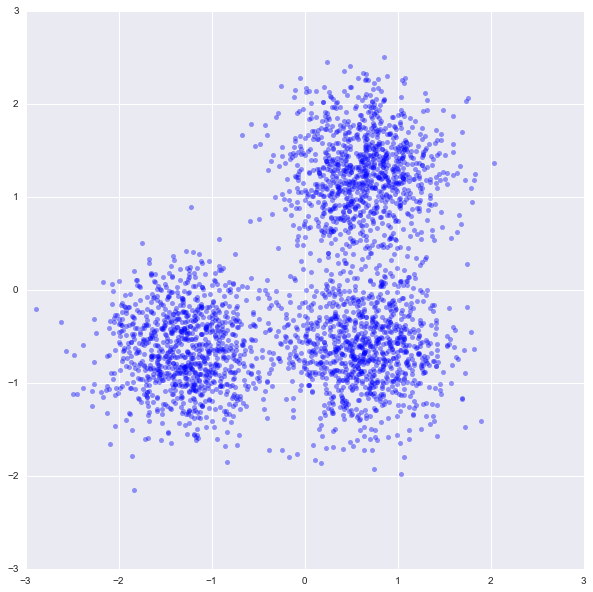

In [6]:
plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'ob',alpha=0.4, markersize=5);

# Premier clustering avec kmeans

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Labels des clusters appris 

In [9]:
k_means_labels = k_means.labels_
k_means_labels_unique = np.unique(k_means_labels)
print(k_means_labels_unique)

[0 1 2]


Centres des clusters appris

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 0.62997653  1.26628987]
 [-1.28388301 -0.64033993]
 [ 0.64439486 -0.64312073]]


### Visualisation

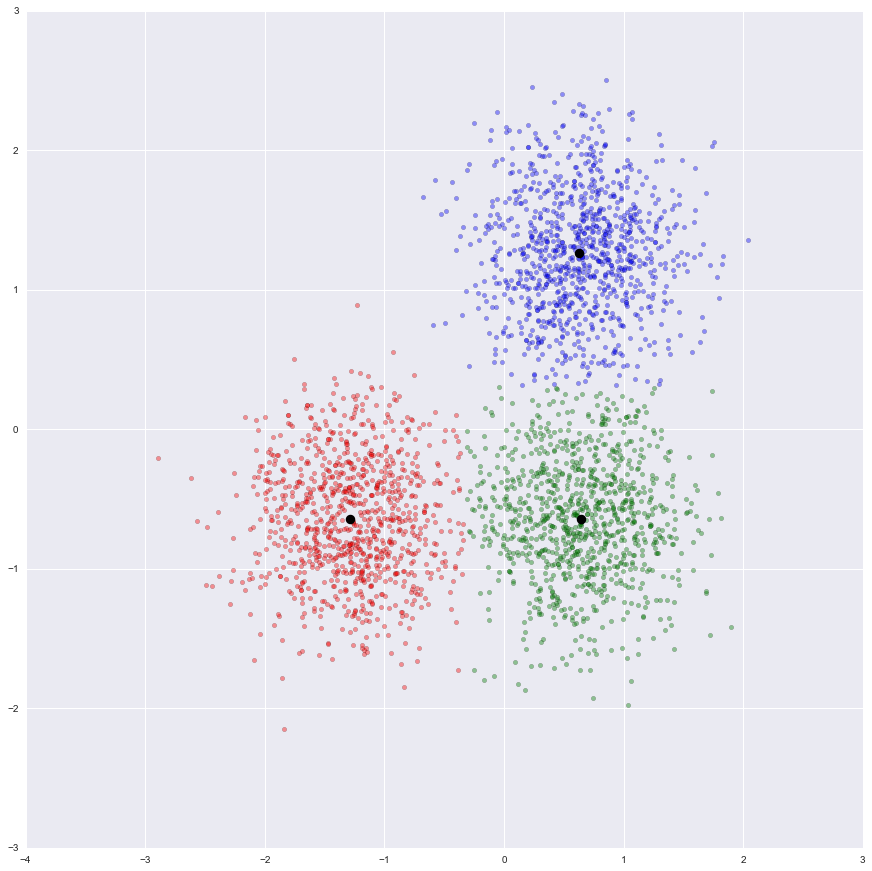

In [11]:
colors = ['b', 'r', 'g']
plt.figure(figsize=(15,15))
for k, color in zip(range(n_clusters), colors):
    members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.scatter(X[members, 0], X[members, 1], marker = 'o',
            c=color, alpha=0.4)
    plt.scatter(cluster_center[0], cluster_center[1], c='black', linewidths=5);

### Calcul de la performance

Le coefficient de silhouette est une métrique usuelle pour évaluer la performance du clustering lorsqu'on ne connaît pas les vrais clusters.

Le coefficient de silhouette est calculé pour chaque échantillon : 

$$SC = \frac{b-a} {max(a, b)}$$

- a est la distance moyenne à tous les points du même cluster
- b est la distance moyenne à tous les autres points du cluster le plus proche.

La silhouette prend des valeurs de -1 (pire performance) à +1 (meilleure performance). Le score global est la moyenne de la silhouette.

In [12]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels)

0.58580703714523841

### Autres métriques

- homogénéité: de 0 à 1 (meilleur)
- complétude d'homogénéité : de 0 à 1 (meilleur)
- V-mesure : de 0 à 1 (meilleur)
- Index aléatoire : de 0 à 1 (meilleur)
- Information mutuelle : de 0 à 1 (meilleur)

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))

## Clustering avec DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.12, min_samples=10)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.12, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [14]:
# Nombre de clusters découverts, en enlevant le cluster du bruit (label=-1) s'il y en a un
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Nombre de clusters", n_clusters_)

Nombre de clusters 5


### Visualisation

//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


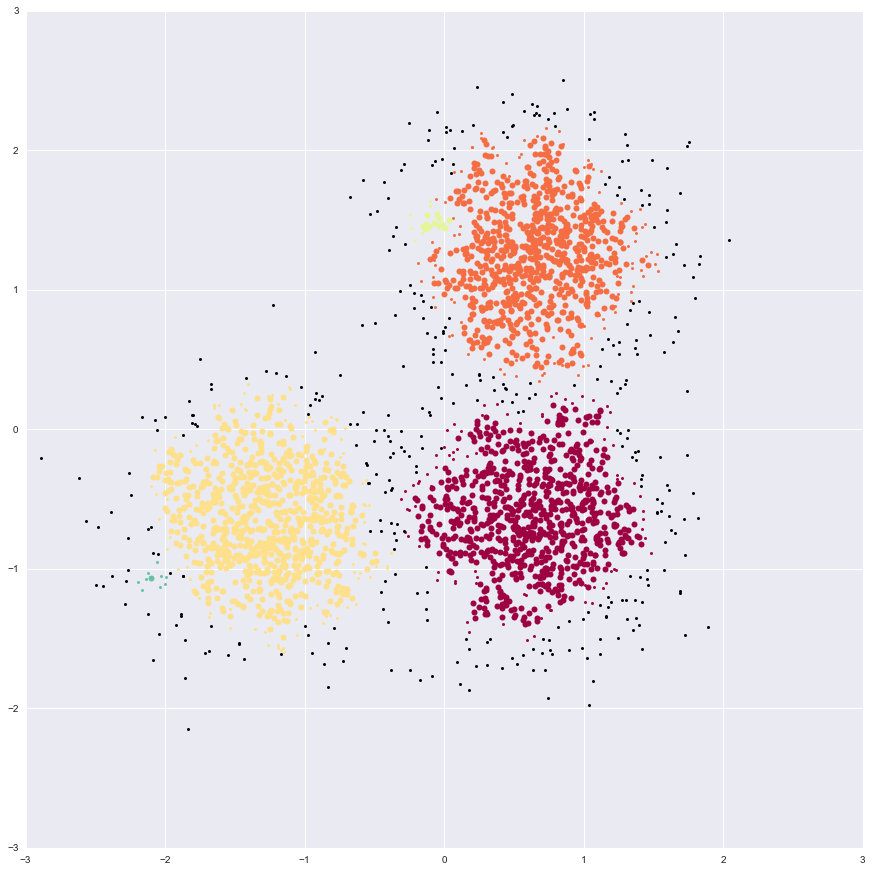

In [15]:
plt.figure(figsize=(15,15))
unique_labels = set(labels)

# Construction d'un vecteur qui dit si le point appartient au coeur du cluster ou non
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# génération des couleurs des clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Le bruit est indiqué en noir ('k')
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=3);

### Performance

In [16]:
from sklearn import metrics
metrics.silhouette_score(X, db.labels_)

0.24769371162646167

In [17]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))

Homogeneity: 0.821
Completeness: 0.652
V-measure: 0.727
Adjusted Rand Index: 0.763
Adjusted Mutual Information: 0.651


# Un autre exemple

## Génération de clusters

In [18]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=3000, factor=.5, noise=.07)
X = StandardScaler().fit_transform(X)

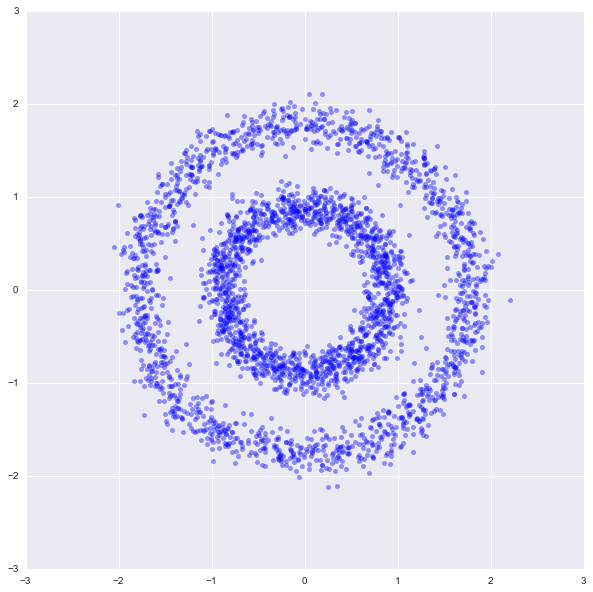

In [19]:
plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'ob',alpha=0.4, markersize=5);

## Clustering avec kmeans

Une fonction pour trouver le meilleur nombre de clusters

In [20]:
def silhouette_kmeans(k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(X)
    labels = k_means.labels_
    hom = metrics.homogeneity_score(y, labels)
    compl = metrics.completeness_score(y, labels)
    v_meas = metrics.v_measure_score(y, labels)
    rand_ix = metrics.adjusted_rand_score(y, labels)
    ami = metrics.adjusted_mutual_info_score(y, labels)
    sil = metrics.silhouette_score(X, labels)
    return hom, compl, v_meas, rand_ix, ami, sil

In [21]:
nb_clusters = np.arange(2, 15, 1)
scores = []
for k in nb_clusters:
    scores.append(silhouette_kmeans(k))
scores = np.array(scores)

In [22]:
scores = np.array(scores)

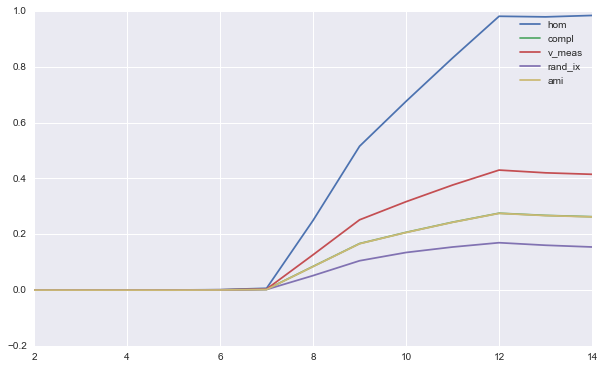

In [23]:
plt.figure(figsize=(10,6))
plt.plot(nb_clusters, scores[:, 0], label='hom')
plt.plot(nb_clusters, scores[:, 1], label='compl')
plt.plot(nb_clusters, scores[:, 2], label='v_meas')
plt.plot(nb_clusters, scores[:, 3], label='rand_ix')
plt.plot(nb_clusters, scores[:, 4], label='ami')
plt.legend();

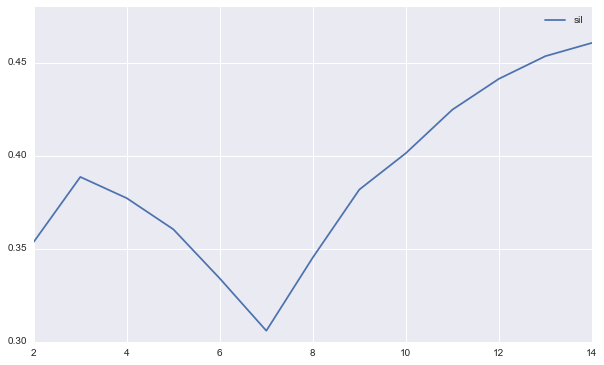

In [24]:
plt.figure(figsize=(10,6))
plt.plot(nb_clusters, scores[:, 5], label='sil')
plt.legend();

### kmeans pour le meilleur hyperparamètre

In [25]:
n_clusters = 12
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
k_means_labels = k_means.labels_
k_means_labels_unique = np.unique(k_means_labels)
print(k_means_labels_unique)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


Centres des clusters appris

In [28]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 0.84037881  0.04299181]
 [-0.71317746  0.48332933]
 [ 0.96046168 -1.43005437]
 [-0.48728424 -1.6319693 ]
 [-0.27685435  1.70243491]
 [ 0.26872274 -0.79672788]
 [-1.51746219  0.79972469]
 [-0.66677646 -0.4982802 ]
 [ 1.17109057  1.2332457 ]
 [ 1.71892567 -0.13728656]
 [ 0.21426134  0.80569388]
 [-1.58404338 -0.71319841]]


### Visualisation

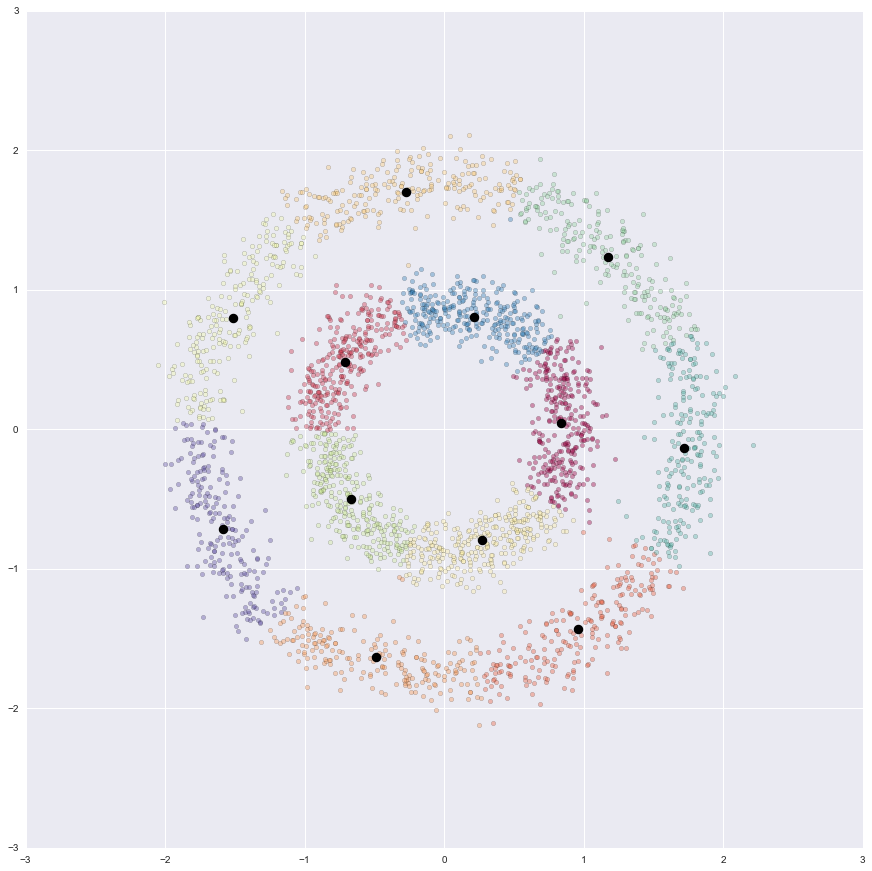

In [29]:
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
plt.figure(figsize=(15,15))
for k, color in zip(range(n_clusters), colors):
    members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.scatter(X[members, 0], X[members, 1], c=color, alpha=0.4)
    plt.scatter(cluster_center[0], cluster_center[1], c='black', linewidths=5);

In [30]:
metrics.silhouette_score(X, k_means.labels_)

0.44055360909972491

### Clustering avec DBSCAN

Une fonction pour trouver les meilleurs hyperparamètres

In [ ]:
def search_db(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    hom = metrics.homogeneity_score(y, labels)
    compl = metrics.completeness_score(y, labels)
    v_meas = metrics.v_measure_score(y, labels)
    rand_ix = metrics.adjusted_rand_score(y, labels)
    ami = metrics.adjusted_mutual_info_score(y, labels)
    sil = metrics.silhouette_score(X, labels)
    return hom, compl, v_meas, rand_ix, ami, sil, n_clusters_, eps, min_samples

In [ ]:
names = ['homogeneity', 'completeness', 'v_measure', 'rand_ix', 'ami', 'silhouette', 
         'n_clusters', 'epsilon', 'min_samples']

In [ ]:
search_db(0.1, 5)

### Recherche dans l'espace des hyperparamètres

In [ ]:
grid_min_samples = np.arange(5, 25, 5)
grid_eps = np.arange(0.1, 0.6, 0.1)

In [ ]:
scores = []
for min_samples in grid_min_samples:
    for eps in grid_eps:
        try:
            scores.append(search_db(eps, min_samples))
        except:
            pass
scores = np.array(scores)
scores = pd.DataFrame(scores, columns=names)

In [ ]:
scores.head()

Nombre de clusters

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scores['n_clusters'], label='nb_clusters')
plt.legend();

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(scores['n_clusters'], scores['silhouette'], label='silhouette')
plt.xlim(0, 10)
plt.legend();

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scores['homogeneity'], label='homogeneity')
plt.plot(scores['completeness'], label='completeness')
plt.plot(scores['v_measure'], label='v_measure')
plt.plot(scores['rand_ix'], label='rand_ix')
plt.plot(scores['ami'], label='ami')
plt.plot(scores['silhouette'], label='silhouette')
plt.legend();

In [ ]:
scores.iloc[3:6,:]

### Visualisation pour les meilleurs hyperparamètres

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(X)

In [ ]:
# Nombre de clusters découverts, en enlevant le cluster du bruit (label=-1) s'il y en a un
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print "Nombre de clusters", n_clusters_

In [ ]:
plt.figure(figsize=(15,15))
unique_labels = set(labels)

# Construction d'un vecteur qui dit si le point appartient au coeur du cluster ou non
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# génération des couleurs des clusters
colors = ['r', 'b']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Le bruit est indiqué en noir ('k')
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=3);

## 2D SOM

Carte : $n$ noeuds auxquels sont associés $n$ vecteurs $m_i$ ($i=1, \cdots, n$).

**Apprentissage :**

A chaque itération $t$, on cherche le noeud c qui a le vecteur $m_c$ le plus proche de l'échantillon $x(t)$.

Mise à jour des vecteurs des noeuds : 
$$ m_i(t+1) = m_i(t) +h_{ci}(t)[x(t) - m_i(t)] $$

$h_{ci}(t)$ est appelée la fonction de voisinage.

Il faut pour la convergence de l'agorithme que :

-$h_{ci}(t)\to 0$ lorsque $t\to\infty$

**Formes usuelles :**
$$ h_{ci}(t)=\alpha(t) \exp(-\frac{||r_c-r_i||^2}{2\sigma^2(t)}) $$

où :

- $\alpha$ est le taux d'apprentissage
- $r_i$ est la position du noeud $i$ dans la carte
- $\sigma(t)$ est la "largeur du noyau" : intuitivement, c'est le rayon du "voisinage d'un noeud

<img src="images/som_voisinage.png">

In [ ]:
def denormalize_by(data_by, n_vect, n_method = 'var'):
    #based on the normalization
    if n_method == 'var':
        me = np.mean(data_by, axis = 0)
        st = np.std(data_by, axis = 0)
        vect = n_vect* st + me
        return vect 
    else:
        print 'data is not normalized before'
        return n_vect

In [ ]:
msz0 = 30
msz1 = 30
sm = som.SOM('sm', X, mapsize = [msz0, msz1],norm_method = 'var',
             initmethod='pca')
sm.train(n_job = 1, shared_memory = 'no')
#sm.train(n_job = 1, shared_memory = 'no',verbose='final')

In [ ]:
a = sm.view_U_matrix(distance2=2, row_normalized='No', 
                     show_data='Yes', contooor='Yes', 
                     blob='No', save='No', save_dir='')

In [ ]:
sm.hit_map_cluster_number();

In [ ]:
codebook_norm = pd.DataFrame(denormalize_by(sm.data_raw, sm.codebook))
codebook_norm['cluster'] = sm.cluster_labels
unique_labels = np.unique(sm.cluster_labels)

In [ ]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(15,15))
plt.plot(X[:, 0], X[:, 1], 'ob',alpha=0.2, markersize=5)
for k, col in zip(unique_labels, colors):
    xy = np.array(codebook_norm[codebook_norm['cluster'] == k][[0,1]])
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

## 1D SOM

In [ ]:
msz11 = 1
msz10 = 1000
som2 = som.SOM('som2', X, mapsize = [msz10, msz11],
               norm_method='var', initmethod='pca')

som2.train(n_job = 1, shared_memory = 'no',verbose='off')

codebook = pd.DataFrame(data=som2.codebook[:])

In [ ]:
codebook_n = denormalize_by(som2.data_raw, codebook, n_method = 'var')

fig = plt.figure(figsize=(15,15))
plt.plot(X[:,0],X[:,1],'ob',alpha=0.2, markersize=5)
plt.plot(codebook_n.values[:,0],codebook_n.values[:,1],'o-g',
         linewidth=2,markersize=4);

# Autre exemple

In [ ]:
nb_centers = 7
centers = np.random.random_integers(0,12,size=nb_centers * 2).reshape(nb_centers,2)
print centers
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(X[:, 0], X[:, 1], 'ob',alpha=0.4, markersize=5);

In [ ]:
msz0 = 30
msz1 = 30
sm = som.SOM('sm', X, mapsize = [msz0, msz1],norm_method = 'var',
             initmethod='pca')
#sm.train(n_job = 1, shared_memory = 'no')
sm.train(n_job = 1, shared_memory = 'no',verbose='final')

In [ ]:
a = sm.view_U_matrix(distance2=2, row_normalized='No', 
                     show_data='Yes', contooor='Yes', 
                     blob='No', save='No', save_dir='')

In [ ]:
sm.hit_map_cluster_number();

In [ ]:
codebook_norm = pd.DataFrame(denormalize_by(sm.data_raw, sm.codebook))
codebook_norm['cluster'] = sm.cluster_labels
unique_labels = np.unique(sm.cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(15,15))
plt.plot(X[:, 0], X[:, 1], 'ob',alpha=0.2, markersize=5)
for k, col in zip(unique_labels, colors):
    xy = np.array(codebook_norm[codebook_norm['cluster'] == k][[0,1]])
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

In [ ]:
msz11 = 1
msz10 = 1000
som2 = som.SOM('som2', X, mapsize = [msz10, msz11],
               norm_method='var', initmethod='pca')

som2.train(n_job = 1, shared_memory = 'no',verbose='off')

codebook = pd.DataFrame(data=som2.codebook[:])

In [ ]:
codebook_n = denormalize_by(som2.data_raw, codebook, n_method = 'var')

fig = plt.figure(figsize=(15,15))
plt.plot(X[:,0],X[:,1],'ob',alpha=0.2, markersize=5)
plt.plot(codebook_n.values[:,0],codebook_n.values[:,1],'o-g',
         linewidth=2,markersize=4)